<h1> Dependencies and Functions </h1>

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path


def import_data(exp):
    #To Import data from CSV file
    link = os.path.join('data', exp, )
    df_car = pd.read_csv(os.path.join('data', 
            exp, 'Car.csv' ))
    df_bus = pd.read_csv(os.path.join('data', 
            exp, 'Bus.csv' ))
    df_tram = pd.read_csv(os.path.join('data', 
            exp, 'Tram.csv' ))
    time = df_car['Time'].to_numpy()
    
    for i in range(len(time)):
        time[i] = time[i][-2:]

    return df_car, df_bus, df_tram, time

def arrange_data2(time, df_car,df_bus,df_tram,dirr):
    #Arrange data in a single DataFrame
    df = pd.DataFrame({'Time' : time})
    df['Car'] = df_car['Direction ' + dirr]
    df['Bus'] = df_bus['Direction ' + dirr]
    df['Tram'] = df_tram['Direction ' + dirr]
    
    return df

def plot_bar(df,x,y,name):
    fig = df.plot.bar(x= "Time", 
        y=["Car" ,"Bus", "Tram" ], 
        figsize=(x,y), stacked="True", 
        xlabel="Time in Minutes", 
        ylabel="Frequency" , 
        color=['orange','blue','green'], 
        title = name, 
        ).get_figure()
    return fig


def interval(df,i):
    #To change sampling interval
    df = df.set_index(
        df.index // i).groupby(
        level=0).sum()
    return df
    




<h2> Data Analysis </h2>

[8.0, 0.0, 7.0, 2.0, 8.0, 163.0, 22.0, 4.0, 1.0, 11.0, 2.0, 9.0, 265.0, 12.0]
[12.0, 1.0, 8.0, 4.0, 6.0, 218.0, 10.0, 5.0, 3.0, 7.0, 5.0, 4.0, 129.0, 10.0]
[7.0, 0.0, 6.0, 5.0, 6.0, 268.0, 7.0, 9.0, 2.0, 4.0, 1.0, 0.0, 201.0, 7.0]
[14.0, 0.0, 8.0, 5.0, 5.0, 206.0, 20.0, 11.0, 2.0, 2.0, 2.0, 2.0, 261.0, 16.0]


,Car,Bus,Tram,Total for each Exp
Exp1,482.0,21.0,11.0,514.0
Exp2,393.0,17.0,12.0,422.0
Exp3,495.0,17.0,11.0,523.0
Exp4,512.0,25.0,17.0,554.0
Total for each Vehicle,1882.0,80.0,51.0,2013.0


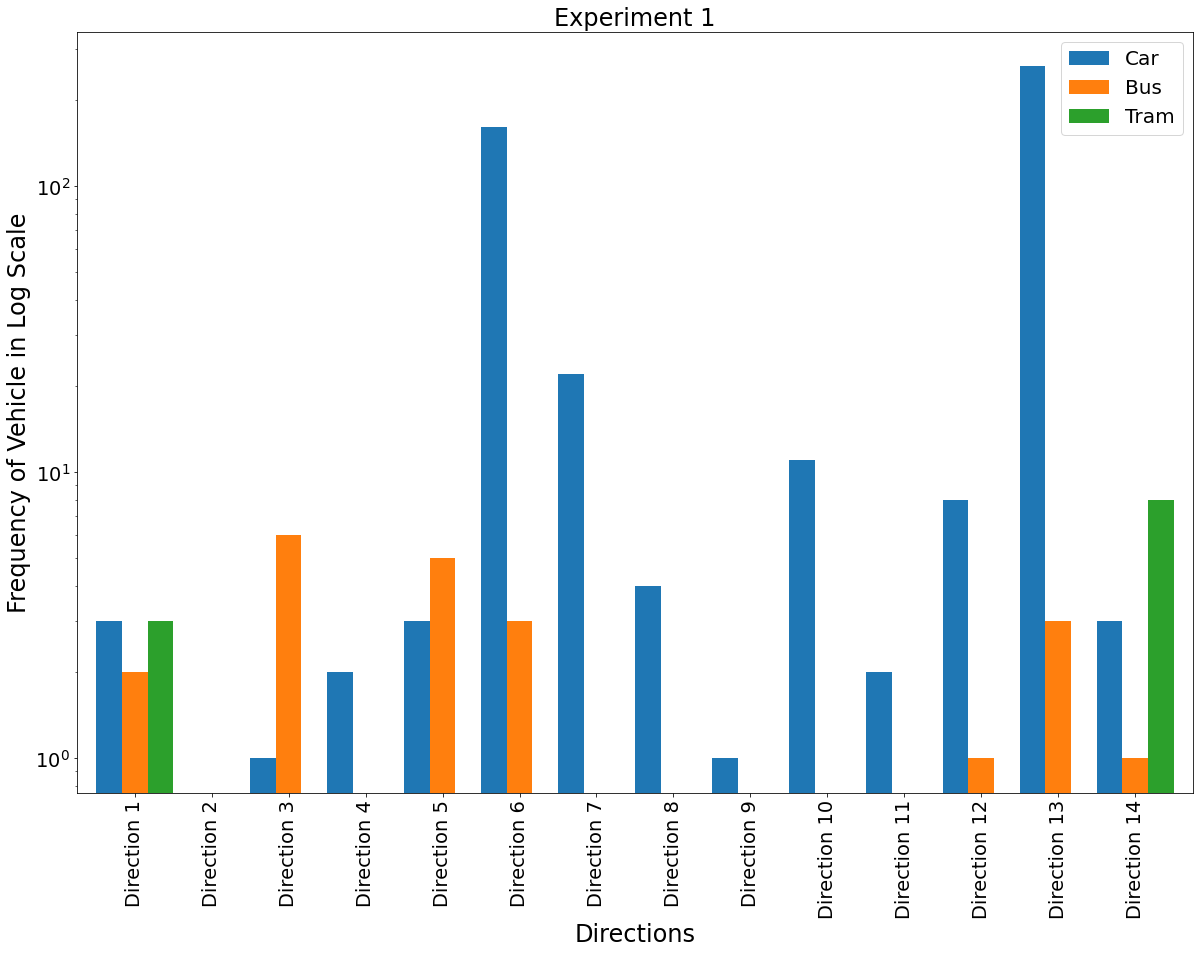

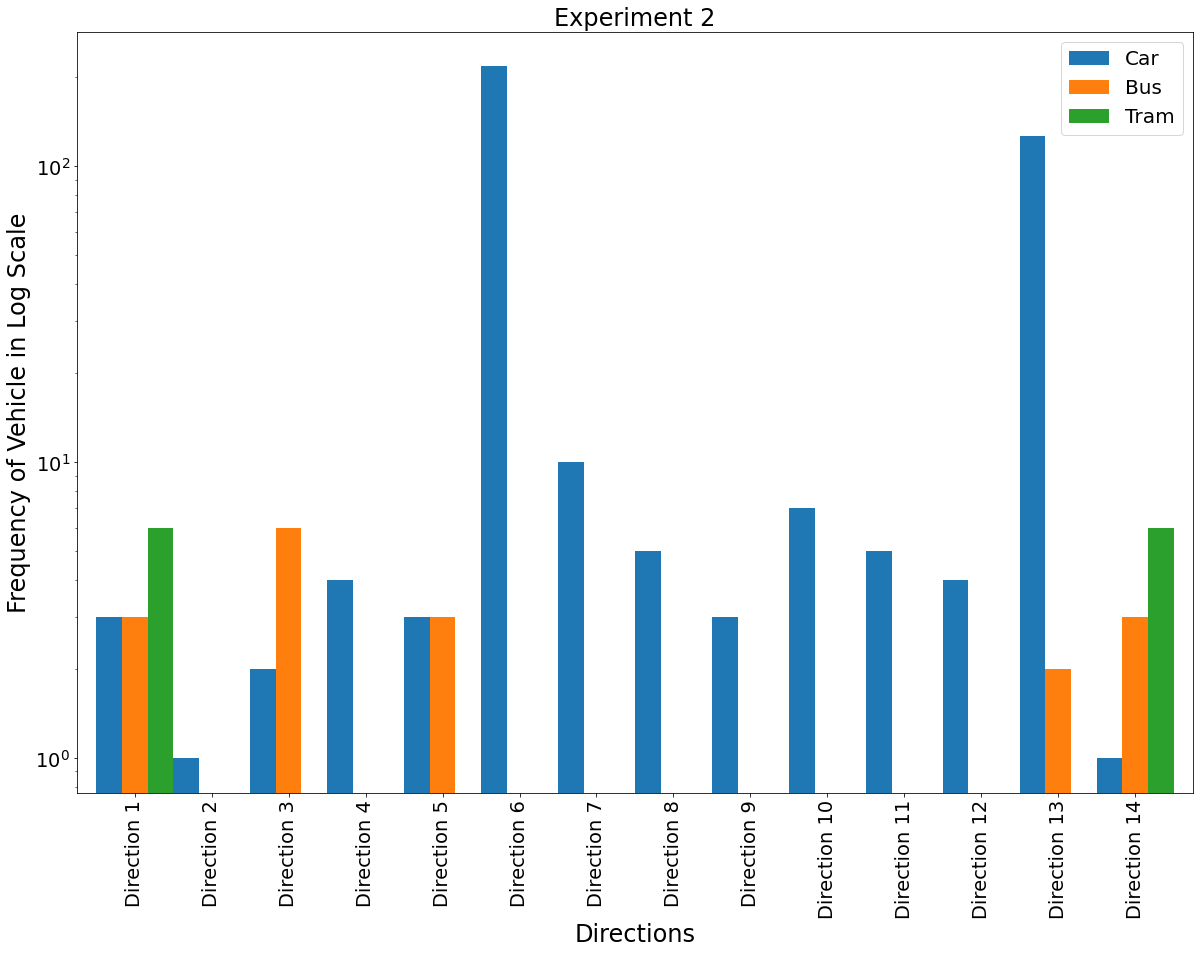

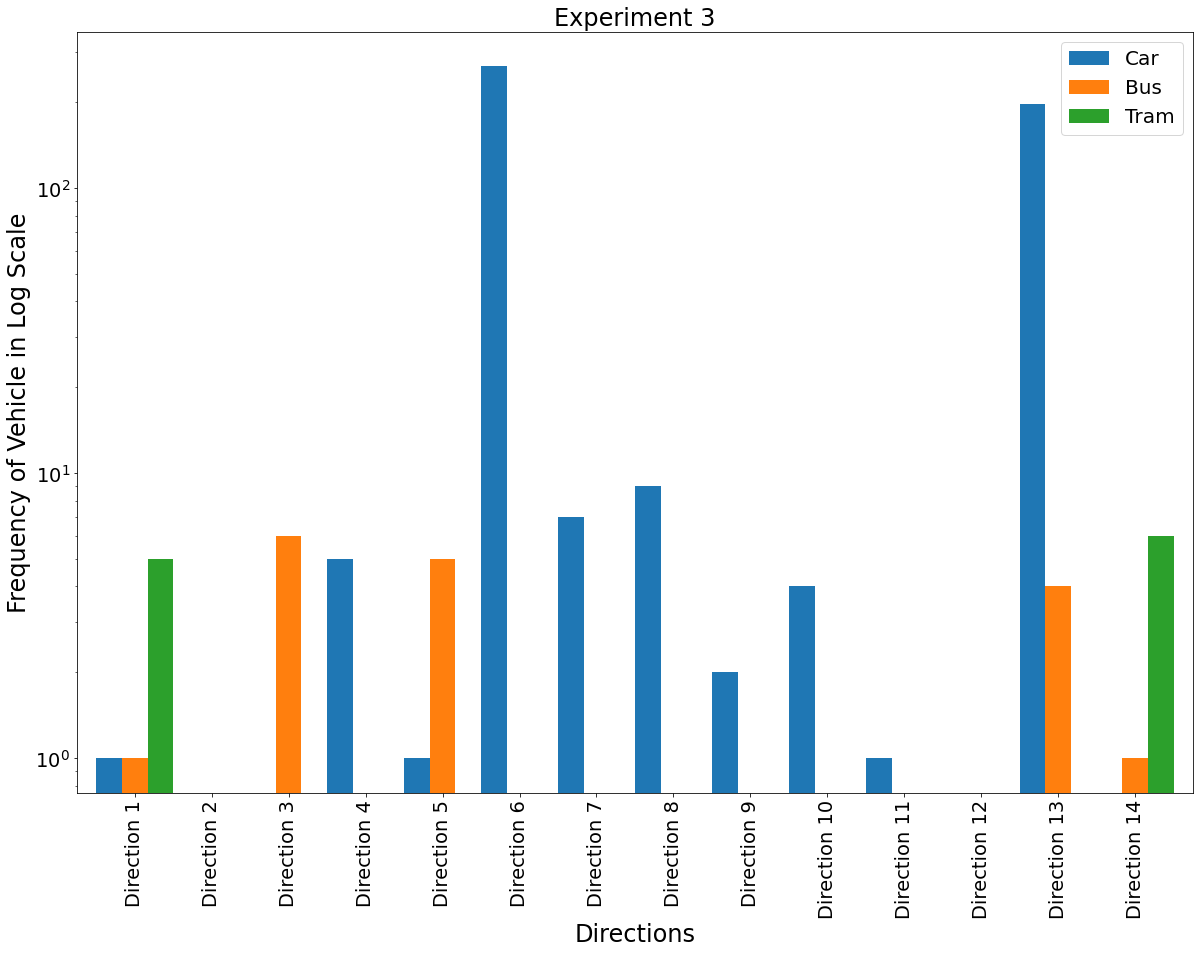

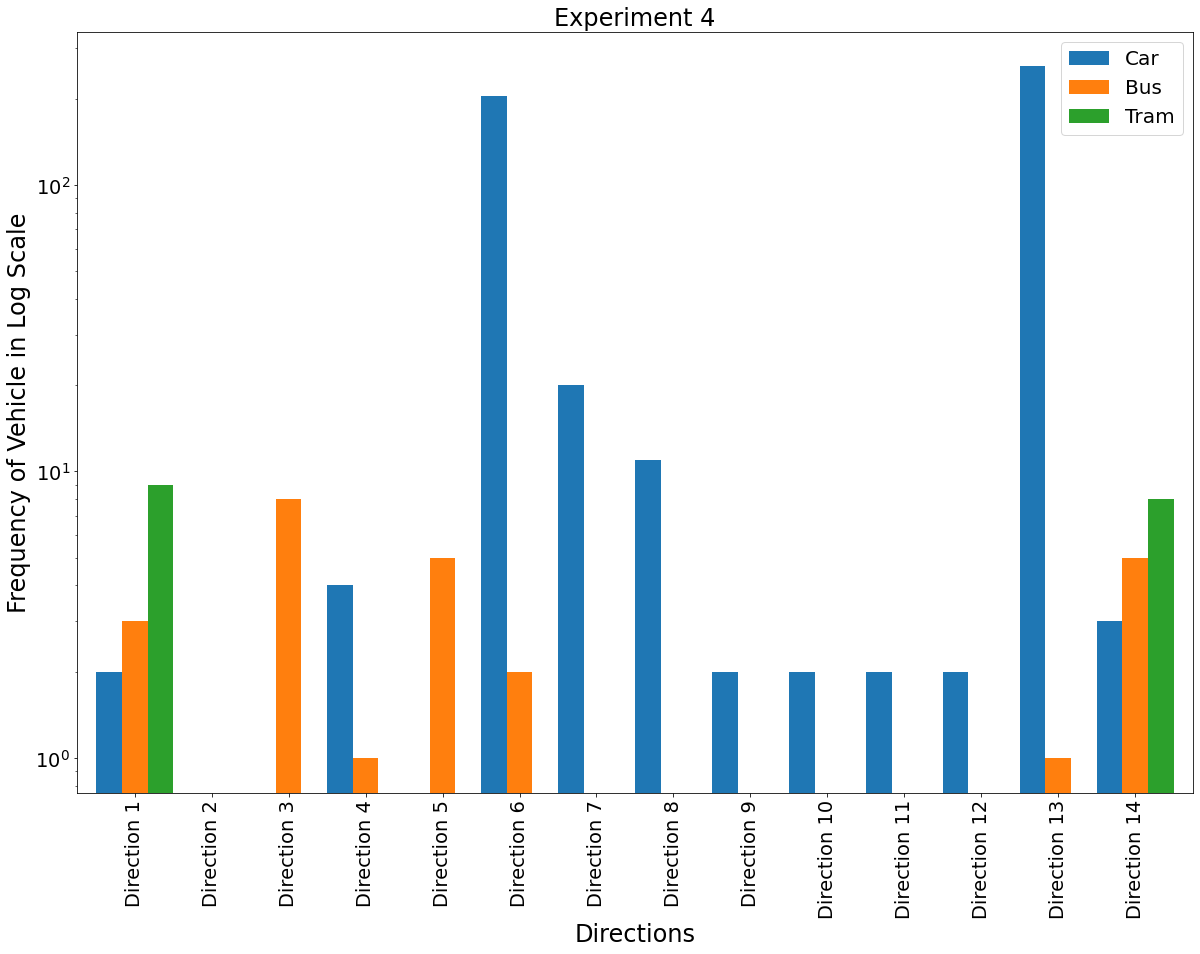

In [174]:
def vehicle_details(df):
    
    if 'Time' in df.columns:
        df.drop('Time', axis=1, inplace=True)
    
    no_of_vehicles = df.sum(numeric_only=True).tolist()
    max_vehicles = max(no_of_vehicles)
    sum_vehicles = sum(no_of_vehicles)
    index_of_largest = no_of_vehicles.index(max(no_of_vehicles)) + 1
    
#   print(df.sum(axis = 0))
#   display(df.sum(axis = 0).plot.bar())
#   plt.show()
    
    return no_of_vehicles, sum_vehicles, index_of_largest, max_vehicles

def study_data(df_car, df_bus, df_tram, exp):
    total_vehicles = [vehicle_details(df_car)[1], 
                     vehicle_details(df_bus)[1],
                     vehicle_details(df_tram)[1]]
    
    temp_list = [vehicle_details(df_car)[0], 
                 vehicle_details(df_bus)[0], 
                 vehicle_details(df_tram)[0] ]
    
    sum_list = [a + b for a, b in zip(vehicle_details(df_car)[0], 
                 vehicle_details(df_bus)[0])]
    
    sum_list = [a + b for a, b in zip(sum_list, 
                 vehicle_details(df_tram)[0])]
     
    print(sum_list)
    index = df_car.columns.tolist()

    data_summary = pd.DataFrame({'Car' : temp_list[0],
                                'Bus' : temp_list[1],
                                 'Tram' : temp_list[2],
                                }, index = index)
    fig = data_summary.plot.bar(logy = True, figsize=(20,14), 
                          rot=0, width = 1,  
                          xlabel="Directions", 
                         fontsize = 19.5)
    
    fig.set_ylabel('Frequency of Vehicle in Log Scale',
                   fontdict={'fontsize':24})

    fig.set_xlabel('Directions',
                   fontdict={'fontsize':24})
    
    fig.legend(loc=1,fontsize=20);
    
    fig.set_title("Experiment " + exp[-1], fontdict={'fontsize':24})
    
    plt.xticks(rotation=90)
    
    plt.savefig(exp + '.pdf')
    
    
    
    
    
    return total_vehicles


table_vehicle = []
for i in ['Exp1', 'Exp2', 'Exp3', 'Exp4']:
        temp = i
        df_car, df_bus, df_tram, time = import_data(i)
        table_vehicle.append(study_data(df_car, df_bus, df_tram, temp))
        

    

data_summary = pd.DataFrame(table_vehicle, index = ['Exp1', 'Exp2', 'Exp3', 'Exp4'], columns = ['Car', 'Bus', 'Tram'])

exp_total = data_summary.sum(axis = 1).tolist()

data_summary['Total for each Exp'] = exp_total

vehicle_total = pd.DataFrame(data_summary.sum(axis = 0).to_dict(), index = ['Total for each Vehicle'])

data_summary = pd.concat([data_summary, vehicle_total])



display(data_summary)


<h1> Plotting Direction 13 from Experiment 1  </h1>

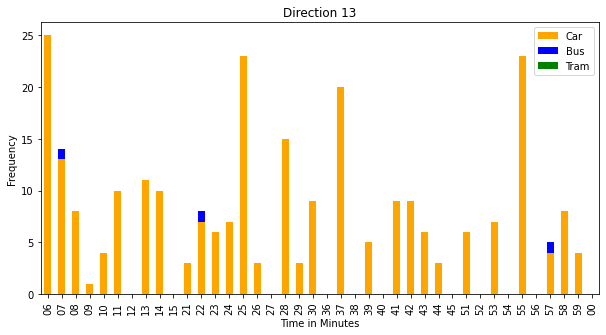

In [47]:
df_car, df_bus, df_tram, time = import_data('Exp1')
df = arrange_data2(time, df_car, df_bus, df_tram, '13')
fig = plot_bar(df, 10, 5, "Direction 13")

fig.savefig("13.pdf")

<h1> Plotting Direction 6 from Experiment 2  </h1>

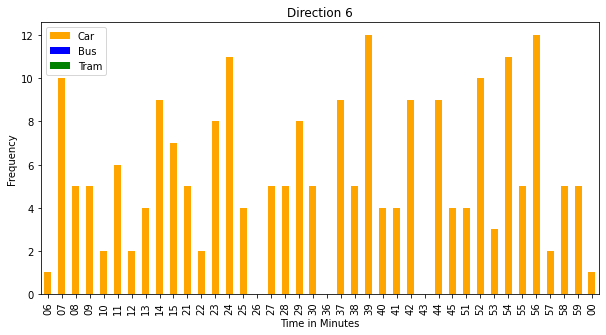

In [2]:
df_car, df_bus, df_tram, time = import_data('Exp2')
df = arrange_data2(time, df_car, df_bus, df_tram, '6')
fig = fig = plot_bar(df, 10, 5, "Direction 6")
fig.savefig("6.pdf")

<h1> Plotting Direction 1 from Experiment 4  </h1>

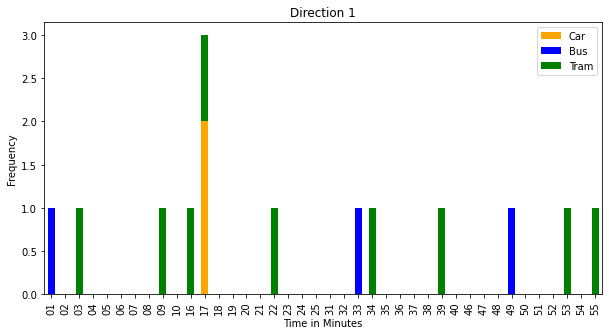

In [138]:
df_car, df_bus, df_tram, time = import_data('Exp4')
df = arrange_data2(time, df_car, df_bus, df_tram, '1')
fig = plot_bar(df, 10, 5, "Direction 1")


<h3> Since interval of frquency is large, interval is changed to 5 minutes instead of 1. </h3> 


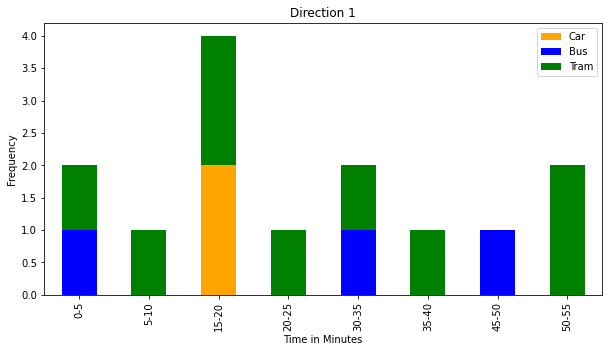

In [140]:
df_car1 = interval(df_car,5)
df_bus1 = interval(df_bus,5)
df_tram1 = interval(df_tram,5)
time_interval = ["0-5", "5-10" , "15-20", "20-25" , "30-35" , "35-40" , "45-50" , "50-55" ]

df = arrange_data2(time_interval, df_car1, df_bus1, df_tram1, '1')
fig = plot_bar(df, 10, 5, "Direction 1")
fig.savefig("1.pdf")

<h1> Plotting Direction 14 from Experiment 4  </h1>

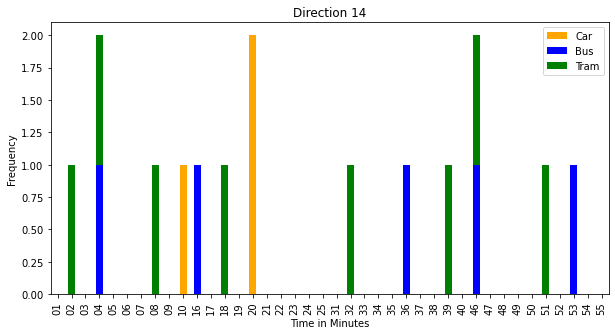

In [141]:
df_car, df_bus, df_tram, time = import_data('Exp4')
df = arrange_data2( time, df_car, df_bus, df_tram,'14')
fig = plot_bar(df, 10, 5, "Direction 14")

<h3> Changing Interval to 5 minutes we get the following graph. </h3>

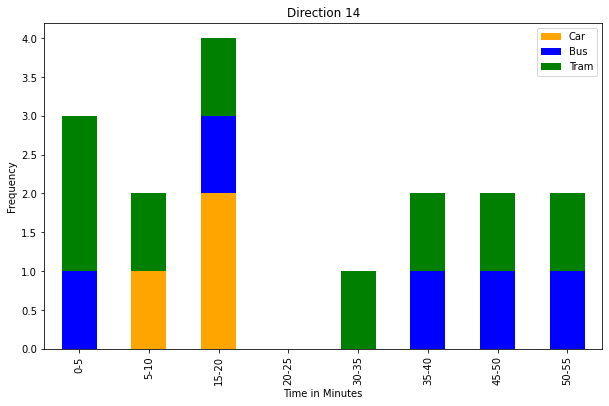

In [142]:
df_car1 = interval(df_car,5)
df_bus1 = interval(df_bus,5)
df_tram1 = interval(df_tram,5)
time_interval = ["0-5", "5-10" , "15-20", "20-25" , "30-35" , "35-40" , "45-50" , "50-55" ]

df = arrange_data2(time_interval, df_car1, df_bus1, df_tram1, '14')
fig = plot_bar(df, 10, 6, "Direction 14")
fig.savefig("14.pdf")